<h1><center>YOLO V5 Car Object Detection</center></h1>

<img src="https://pjreddie.com/media/image/yologo_2.png" width="400" height="400" />


<div style="text-align: right"> Source: https://pjreddie.com/</div>

### Libraries 📚⬇

In [ ]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%time

!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 12652, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 12652 (delta 6), reused 7 (delta 1), pack-reused 12633
Receiving objects: 100% (12652/12652), 12.79 MiB | 27.17 MiB/s, done.
Resolving deltas: 100% (8718/8718), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 86.9 ms, sys: 56.2 ms, total: 143 ms
Wall time: 8.22 s


## Loading Data 📝 / Preprocessing ⚙️

In [ ]:
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('/content/input/car-object-detection/data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [ ]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'/content/input/car-object-detection/data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_16400


(380, 676, 3)

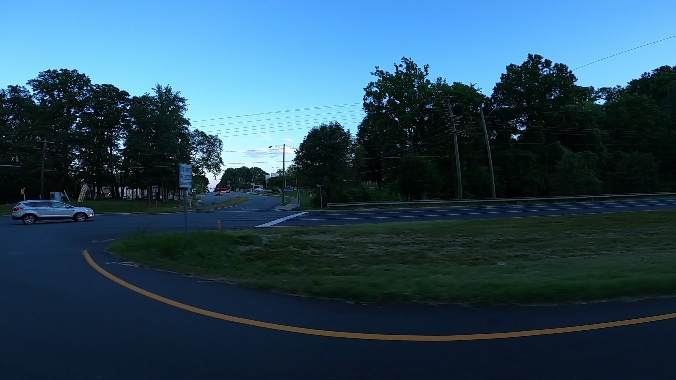

In [ ]:
image = random.choice(index)
Image(filename=f'/content/input/car-object-detection/data/training_images/{image}.jpg',width=600)

## Training (Work in Progress)

In [ ]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/content/input/car-object-detection/data/{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/355 [00:00<?, ?it/s]

In [ ]:
#!python train.py --batch 2 --epochs 1 --data ../input/yolov5-config/car.yaml --cfg ../input/yolov5-config/yolov5x.yaml --name yolov5x_fold0_new

## Prediction

In [ ]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /content/input/car-object-detection/data/resized

detect: weights=['yolov5/yolov5s.pt'], source=/content/input/car-object-detection/data/resized, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-157-g30fa9b6 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/34 /content/input/car-object-detection/data/resized/IMG_8809.jpg: 544x704 17 cars, 355.3ms
image 2/34 /content/input/car-object-detection/data/resized/IMG_8810.jpg: 544x704 15 cars, 338.8ms
image 3/34 /content/input/car-object-detection/data/resized/IMG

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("runs/detect/exp"):
    predicted_files.extend(filenames)

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

NameError: ignored

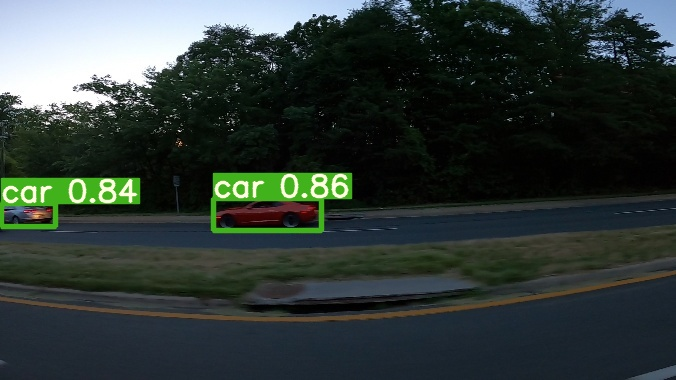

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

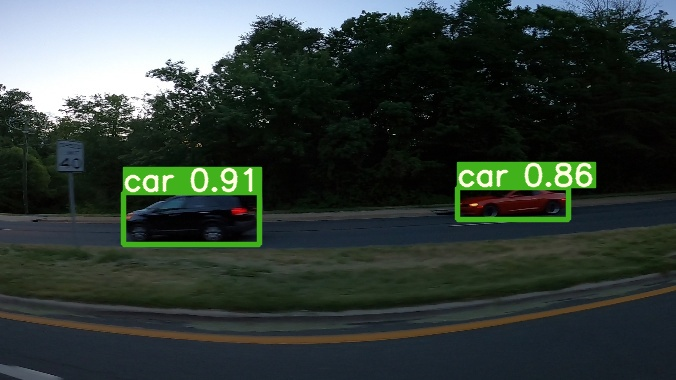

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

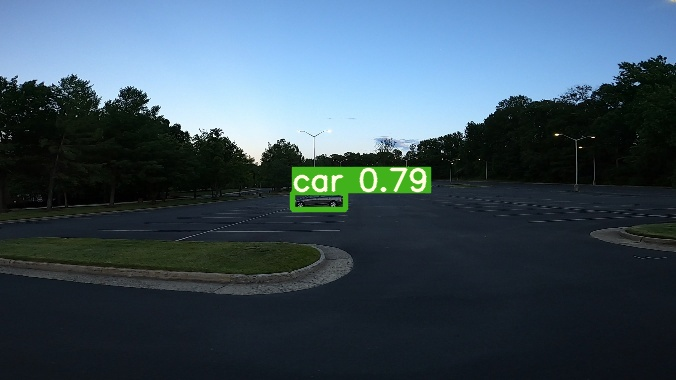

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

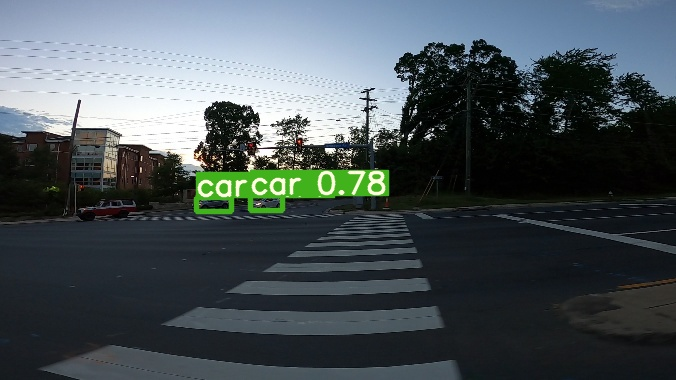

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

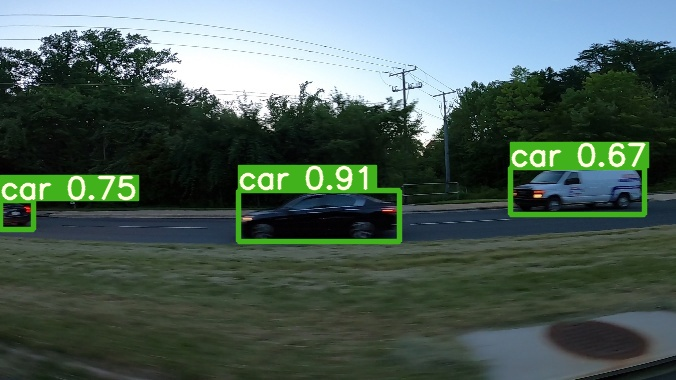

In [ ]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

In [ ]:
!rm -rf runs yolov5

### Work in Progress

### If you found this kernel helpful, please upvote it 🚞

Lo siguiente corresponde a una función dentro de la librería de YOLOV5 para leer los frames de una transmisión de YouTube.
La gracia sería cambiarlo para las cámaras.

Cambiar:
n, f, read = 0, self.frames[i], x

Donde x corresponde a "quiero que se lea cada x frames"


Dataloaders: 
https://github.com/ultralytics/yolov5/blob/574ceedfc5f171a89417175bfb14fda6a2646603/utils/dataloaders.py#L301

In [ ]:
class LoadStreams:
    # YOLOv5 streamloader, i.e. `python detect.py --source 'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP streams`
    def __init__(self, sources='streams.txt', img_size=640, stride=32, auto=True):
        self.mode = 'stream'
        self.img_size = img_size
        self.stride = stride

        if os.path.isfile(sources):
            with open(sources) as f:
                sources = [x.strip() for x in f.read().strip().splitlines() if len(x.strip())]
        else:
            sources = [sources]

        n = len(sources)
        self.imgs, self.fps, self.frames, self.threads = [None] * n, [0] * n, [0] * n, [None] * n
        self.sources = [clean_str(x) for x in sources]  # clean source names for later
        self.auto = auto
        for i, s in enumerate(sources):  # index, source
            # Start thread to read frames from video stream
            st = f'{i + 1}/{n}: {s}... '
            if urlparse(s).hostname in ('www.youtube.com', 'youtube.com', 'youtu.be'):  # if source is YouTube video
                check_requirements(('pafy', 'youtube_dl==2020.12.2'))
                import pafy
                s = pafy.new(s).getbest(preftype="mp4").url  # YouTube URL
            s = eval(s) if s.isnumeric() else s  # i.e. s = '0' local webcam
            if s == 0:
                assert not is_colab(), '--source 0 webcam unsupported on Colab. Rerun command in a local environment.'
                assert not is_kaggle(), '--source 0 webcam unsupported on Kaggle. Rerun command in a local environment.'
            cap = cv2.VideoCapture(s)
            assert cap.isOpened(), f'{st}Failed to open {s}'
            w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = cap.get(cv2.CAP_PROP_FPS)  # warning: may return 0 or nan
            self.frames[i] = max(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), 0) or float('inf')  # infinite stream fallback
            self.fps[i] = max((fps if math.isfinite(fps) else 0) % 100, 0) or 30  # 30 FPS fallback

            _, self.imgs[i] = cap.read()  # guarantee first frame
            self.threads[i] = Thread(target=self.update, args=([i, cap, s]), daemon=True)
            LOGGER.info(f"{st} Success ({self.frames[i]} frames {w}x{h} at {self.fps[i]:.2f} FPS)")
            self.threads[i].start()
        LOGGER.info('')  # newline

        # check for common shapes
        s = np.stack([letterbox(x, self.img_size, stride=self.stride, auto=self.auto)[0].shape for x in self.imgs])
        self.rect = np.unique(s, axis=0).shape[0] == 1  # rect inference if all shapes equal
        if not self.rect:
            LOGGER.warning('WARNING: Stream shapes differ. For optimal performance supply similarly-shaped streams.')

    def update(self, i, cap, stream):
        # Read stream `i` frames in daemon thread
        n, f, read = 0, self.frames[i], 15  # frame number, frame array, inference every 'read' frame
        while cap.isOpened() and n < f:
            n += 1
            # _, self.imgs[index] = cap.read()
            cap.grab()
            if n % read == 0:
                success, im = cap.retrieve()
                if success:
                    self.imgs[i] = im
                else:
                    LOGGER.warning('WARNING: Video stream unresponsive, please check your IP camera connection.')
                    self.imgs[i] = np.zeros_like(self.imgs[i])
                    cap.open(stream)  # re-open stream if signal was lost
            time.sleep(0.0)  # wait time

    def __iter__(self):
        self.count = -1
        return self

    def __next__(self):
        self.count += 1
        if not all(x.is_alive() for x in self.threads) or cv2.waitKey(1) == ord('q'):  # q to quit
            cv2.destroyAllWindows()
            raise StopIteration

        # Letterbox
        img0 = self.imgs.copy()
        img = [letterbox(x, self.img_size, stride=self.stride, auto=self.rect and self.auto)[0] for x in img0]

        # Stack
        img = np.stack(img, 0)

        # Convert
        img = img[..., ::-1].transpose((0, 3, 1, 2))  # BGR to RGB, BHWC to BCHW
        img = np.ascontiguousarray(img)

        return self.sources, img, img0, None, ''

    def __len__(self):
        return len(self.sources)  # 1E12 frames = 32 streams at 30 FPS for 30 years


def img2label_paths(img_paths):
    # Define label paths as a function of image paths
    sa, sb = f'{os.sep}images{os.sep}', f'{os.sep}labels{os.sep}'  # /images/, /labels/ substrings
    return [sb.join(x.rsplit(sa, 1)).rsplit('.', 1)[0] + '.txt' for x in img_paths]